In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale


In [2]:
telecom = pd.read_csv("telecom_churn_data.csv")

In [3]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
telecom.shape

(99999, 226)

In [5]:
## Columns with null values
col_with_null = telecom.columns[telecom.isna().any()].tolist()
print(col_with_null)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t

In [6]:
col_to_del=[]
null_col=[]
for col in col_with_null:
    per_null = round((telecom[col].isna().sum()/telecom.shape[0])*100,2)
    print(col,per_null) 
    if(per_null>73):
        col_to_del.append(col)
    else:
        null_col.append(col)

loc_og_t2o_mou 1.02
std_og_t2o_mou 1.02
loc_ic_t2o_mou 1.02
last_date_of_month_7 0.6
last_date_of_month_8 1.1
last_date_of_month_9 1.66
onnet_mou_6 3.94
onnet_mou_7 3.86
onnet_mou_8 5.38
onnet_mou_9 7.75
offnet_mou_6 3.94
offnet_mou_7 3.86
offnet_mou_8 5.38
offnet_mou_9 7.75
roam_ic_mou_6 3.94
roam_ic_mou_7 3.86
roam_ic_mou_8 5.38
roam_ic_mou_9 7.75
roam_og_mou_6 3.94
roam_og_mou_7 3.86
roam_og_mou_8 5.38
roam_og_mou_9 7.75
loc_og_t2t_mou_6 3.94
loc_og_t2t_mou_7 3.86
loc_og_t2t_mou_8 5.38
loc_og_t2t_mou_9 7.75
loc_og_t2m_mou_6 3.94
loc_og_t2m_mou_7 3.86
loc_og_t2m_mou_8 5.38
loc_og_t2m_mou_9 7.75
loc_og_t2f_mou_6 3.94
loc_og_t2f_mou_7 3.86
loc_og_t2f_mou_8 5.38
loc_og_t2f_mou_9 7.75
loc_og_t2c_mou_6 3.94
loc_og_t2c_mou_7 3.86
loc_og_t2c_mou_8 5.38
loc_og_t2c_mou_9 7.75
loc_og_mou_6 3.94
loc_og_mou_7 3.86
loc_og_mou_8 5.38
loc_og_mou_9 7.75
std_og_t2t_mou_6 3.94
std_og_t2t_mou_7 3.86
std_og_t2t_mou_8 5.38
std_og_t2t_mou_9 7.75
std_og_t2m_mou_6 3.94
std_og_t2m_mou_7 3.86
std_og_t2m_mou_8

In [7]:
## Dropping columns with more than 73 percent null values
telecom=telecom.drop(columns=col_to_del)

In [8]:
print(len(col_to_del))
print(telecom.shape)

40
(99999, 186)


In [9]:
col_to_drop=[]
for col in telecom.columns:
   num = telecom[col].nunique()
   print(col,num)
   if num ==1:
        col_to_drop.append(col)

mobile_number 99999
circle_id 1
loc_og_t2o_mou 1
std_og_t2o_mou 1
loc_ic_t2o_mou 1
last_date_of_month_6 1
last_date_of_month_7 1
last_date_of_month_8 1
last_date_of_month_9 1
arpu_6 85681
arpu_7 85308
arpu_8 83615
arpu_9 79937
onnet_mou_6 24313
onnet_mou_7 24336
onnet_mou_8 24089
onnet_mou_9 23565
offnet_mou_6 31140
offnet_mou_7 31023
offnet_mou_8 30908
offnet_mou_9 30077
roam_ic_mou_6 6512
roam_ic_mou_7 5230
roam_ic_mou_8 5315
roam_ic_mou_9 4827
roam_og_mou_6 8038
roam_og_mou_7 6639
roam_og_mou_8 6504
roam_og_mou_9 5882
loc_og_t2t_mou_6 13539
loc_og_t2t_mou_7 13411
loc_og_t2t_mou_8 13336
loc_og_t2t_mou_9 12949
loc_og_t2m_mou_6 20905
loc_og_t2m_mou_7 20637
loc_og_t2m_mou_8 20544
loc_og_t2m_mou_9 20141
loc_og_t2f_mou_6 3860
loc_og_t2f_mou_7 3863
loc_og_t2f_mou_8 3807
loc_og_t2f_mou_9 3758
loc_og_t2c_mou_6 2235
loc_og_t2c_mou_7 2426
loc_og_t2c_mou_8 2516
loc_og_t2c_mou_9 2332
loc_og_mou_6 26372
loc_og_mou_7 26091
loc_og_mou_8 25990
loc_og_mou_9 25376
std_og_t2t_mou_6 18244
std_og_t2t_mou

In [10]:
print(col_to_drop)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [11]:
##Dropping values with single columns
telecom=telecom.drop(columns=col_to_drop)

In [12]:
### Analyzing columns with null values
col_with_null = telecom.columns[telecom.isna().any()].tolist()
for col in col_with_null:
    num = telecom[col].nunique()
    no_na= round((telecom[col].isna().sum()/len(telecom.index))*100,2)
    print(col,num,no_na)

onnet_mou_6 24313 3.94
onnet_mou_7 24336 3.86
onnet_mou_8 24089 5.38
onnet_mou_9 23565 7.75
offnet_mou_6 31140 3.94
offnet_mou_7 31023 3.86
offnet_mou_8 30908 5.38
offnet_mou_9 30077 7.75
roam_ic_mou_6 6512 3.94
roam_ic_mou_7 5230 3.86
roam_ic_mou_8 5315 5.38
roam_ic_mou_9 4827 7.75
roam_og_mou_6 8038 3.94
roam_og_mou_7 6639 3.86
roam_og_mou_8 6504 5.38
roam_og_mou_9 5882 7.75
loc_og_t2t_mou_6 13539 3.94
loc_og_t2t_mou_7 13411 3.86
loc_og_t2t_mou_8 13336 5.38
loc_og_t2t_mou_9 12949 7.75
loc_og_t2m_mou_6 20905 3.94
loc_og_t2m_mou_7 20637 3.86
loc_og_t2m_mou_8 20544 5.38
loc_og_t2m_mou_9 20141 7.75
loc_og_t2f_mou_6 3860 3.94
loc_og_t2f_mou_7 3863 3.86
loc_og_t2f_mou_8 3807 5.38
loc_og_t2f_mou_9 3758 7.75
loc_og_t2c_mou_6 2235 3.94
loc_og_t2c_mou_7 2426 3.86
loc_og_t2c_mou_8 2516 5.38
loc_og_t2c_mou_9 2332 7.75
loc_og_mou_6 26372 3.94
loc_og_mou_7 26091 3.86
loc_og_mou_8 25990 5.38
loc_og_mou_9 25376 7.75
std_og_t2t_mou_6 18244 3.94
std_og_t2t_mou_7 18567 3.86
std_og_t2t_mou_8 18291 5.38


C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


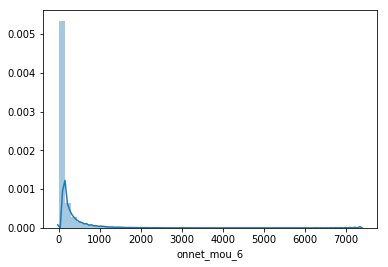

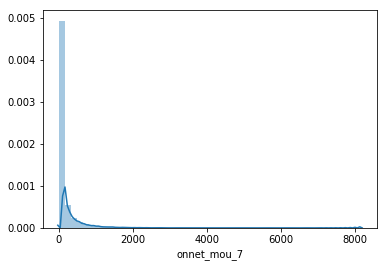

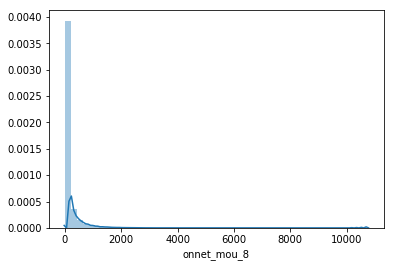

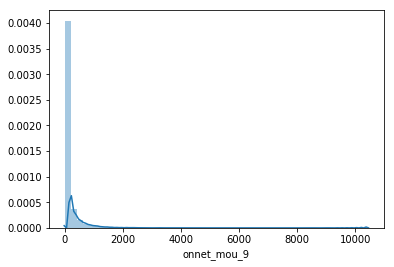

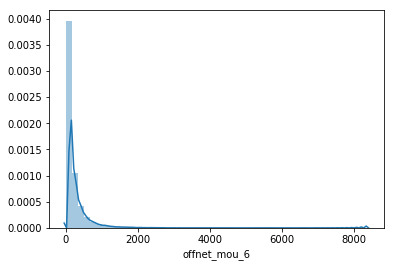

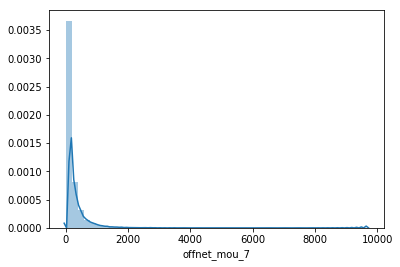

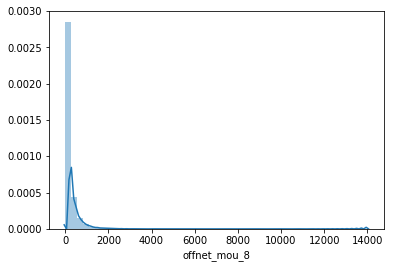

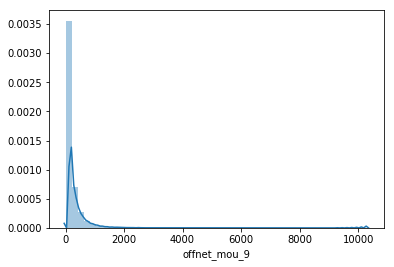

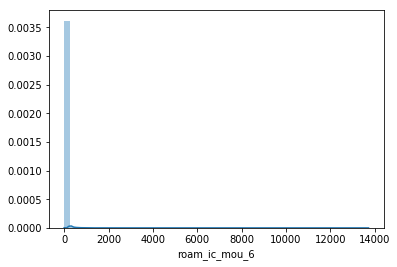

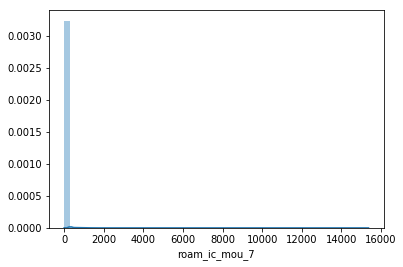

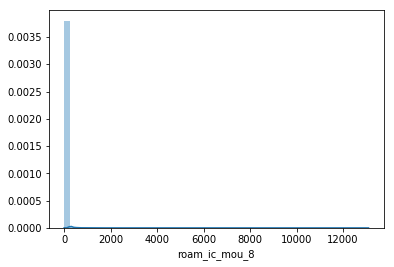

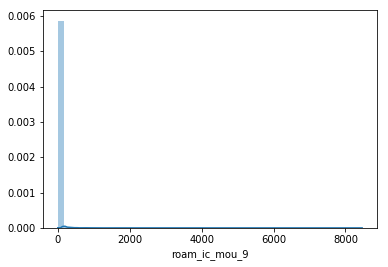

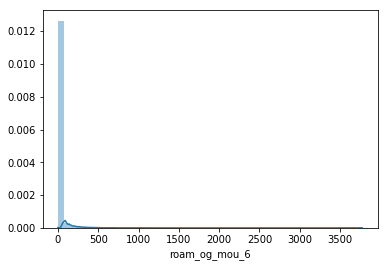

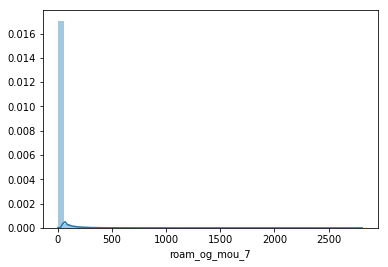

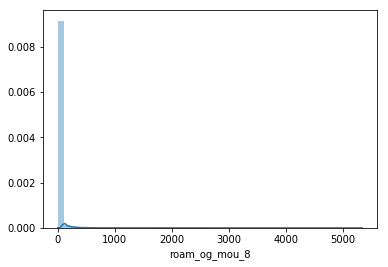

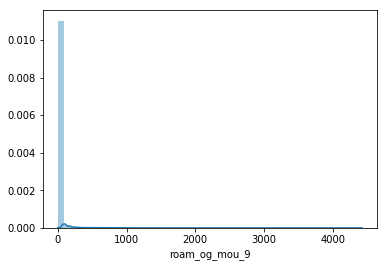

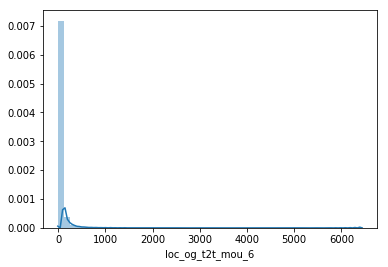

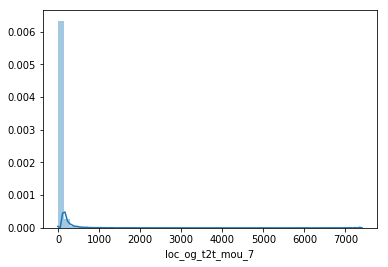

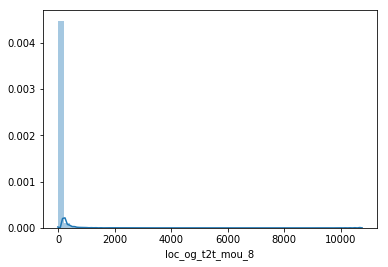

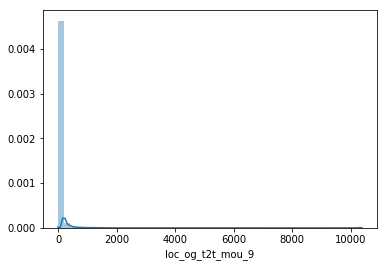

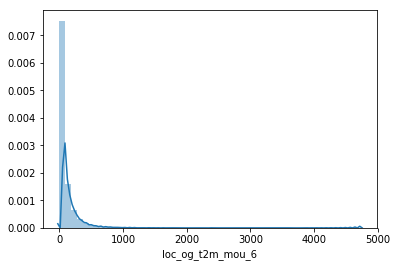

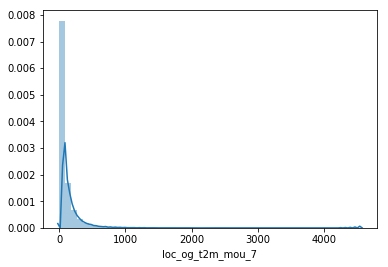

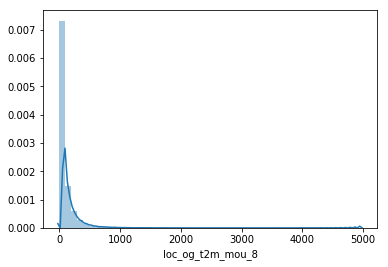

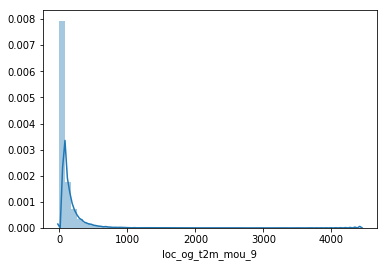

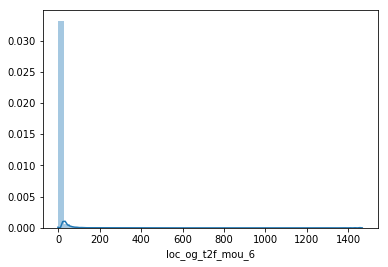

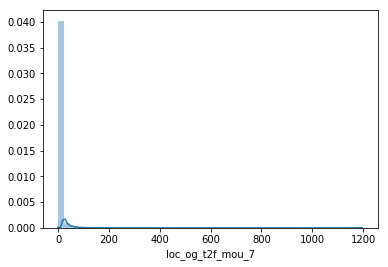

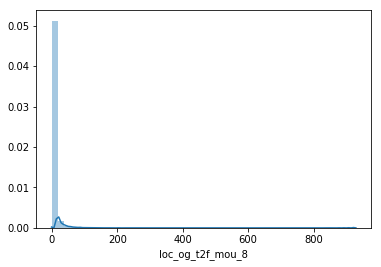

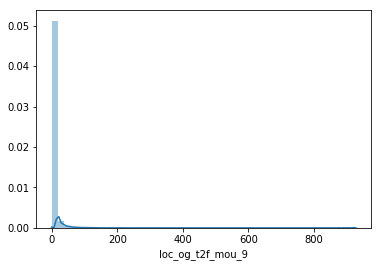

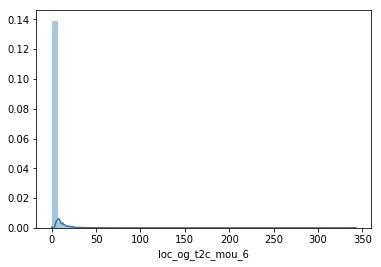

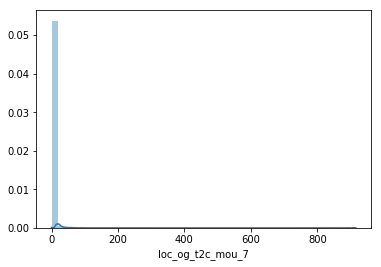

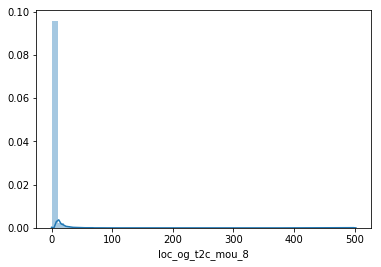

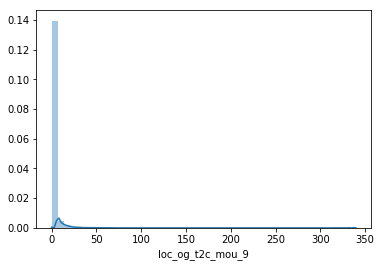

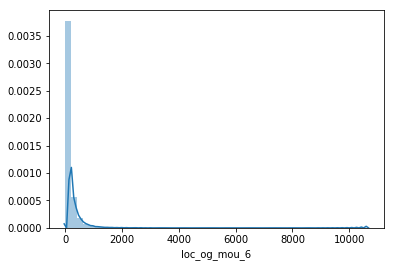

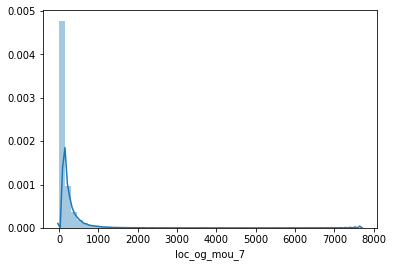

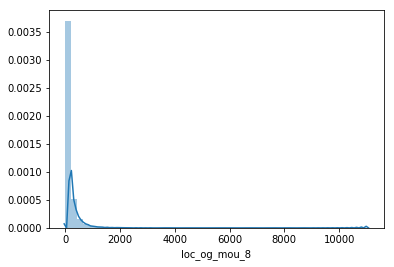

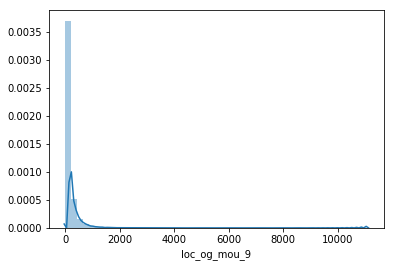

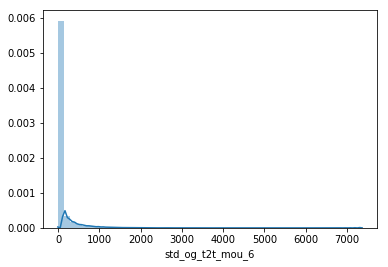

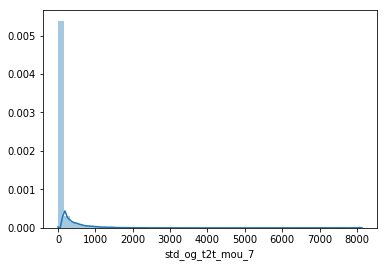

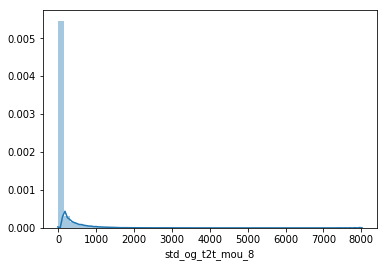

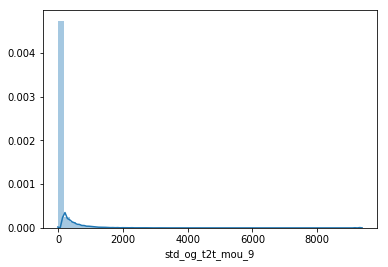

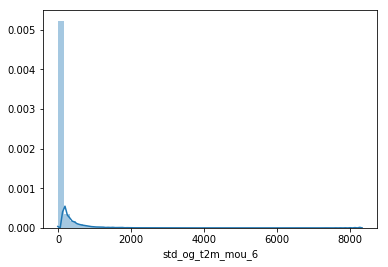

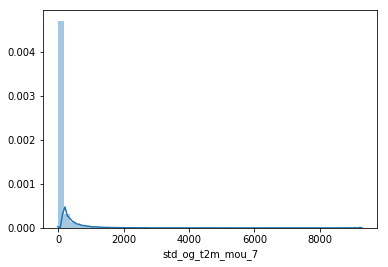

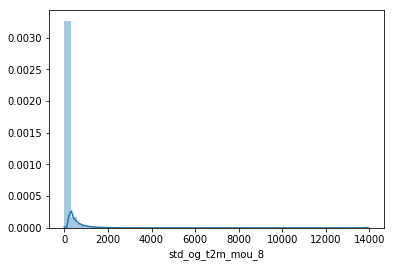

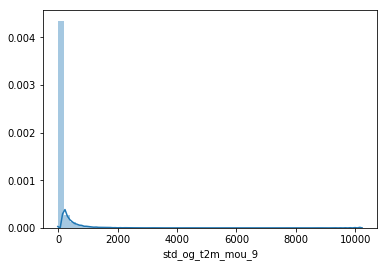

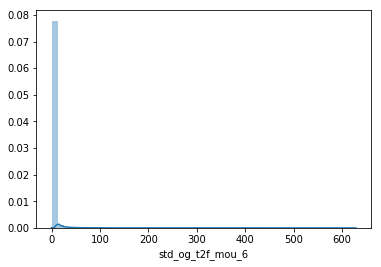

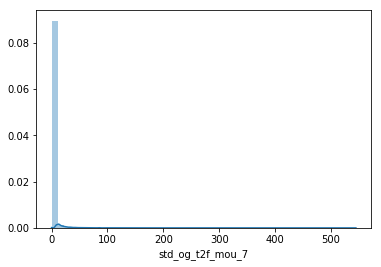

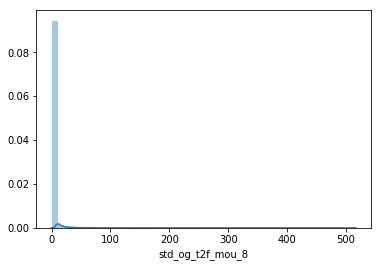

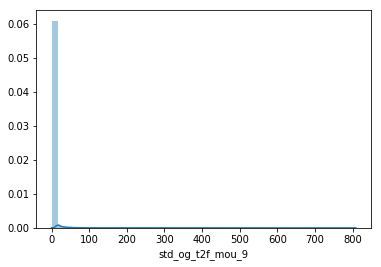

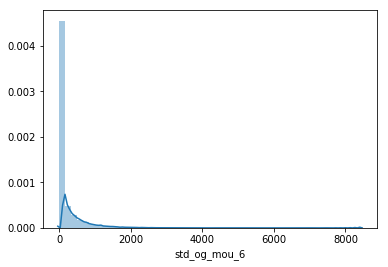

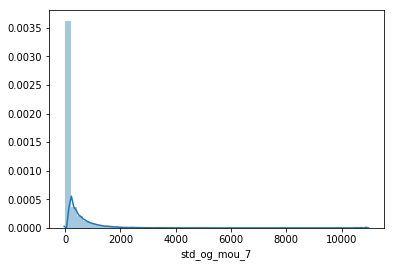

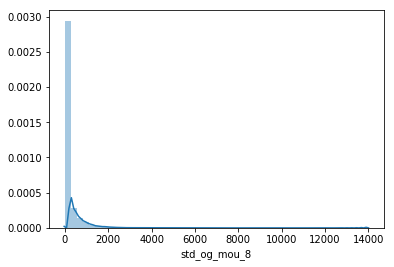

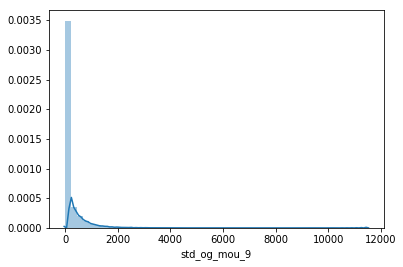

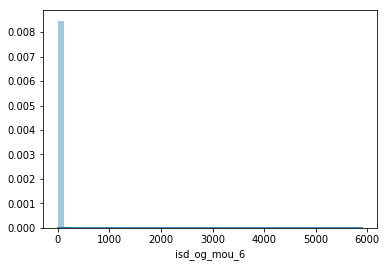

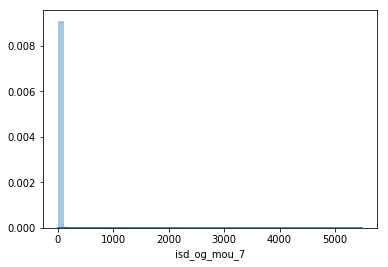

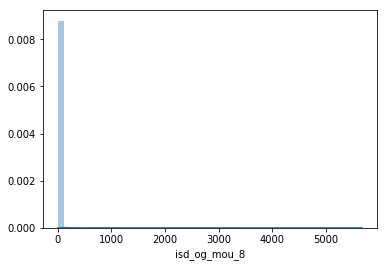

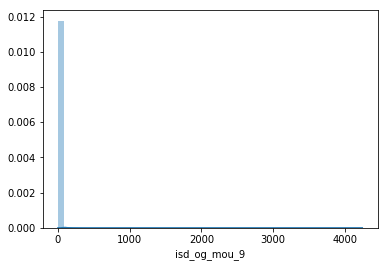

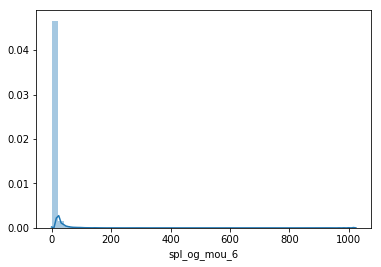

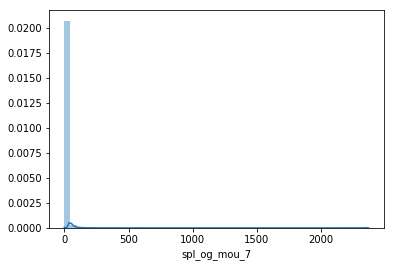

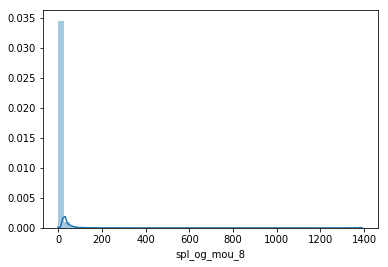

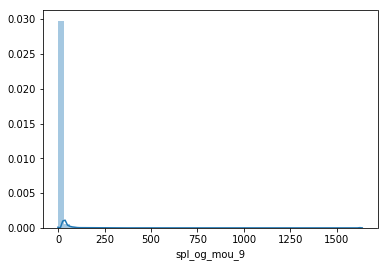

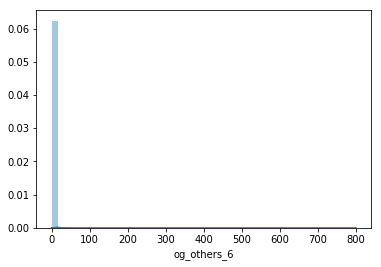

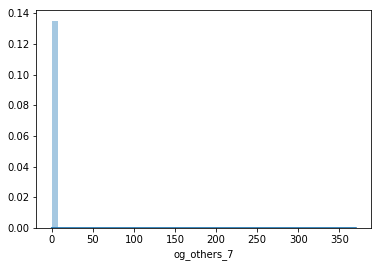

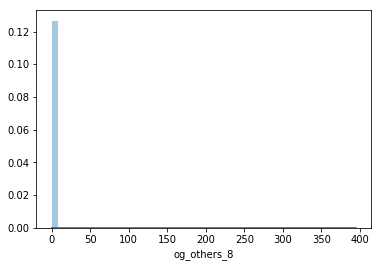

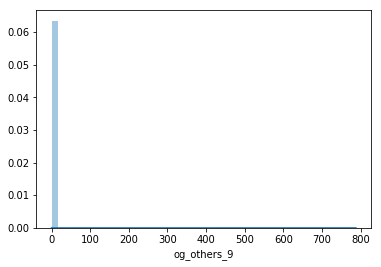

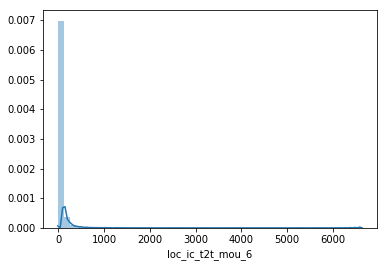

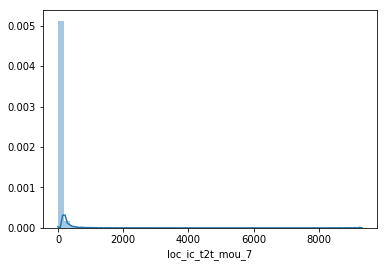

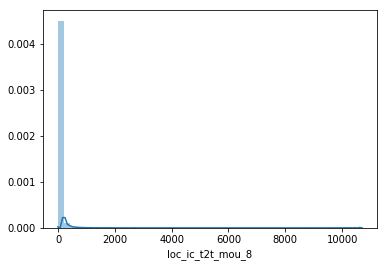

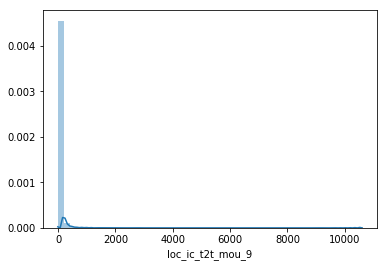

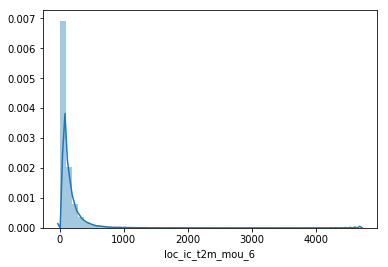

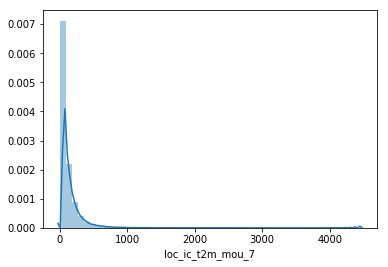

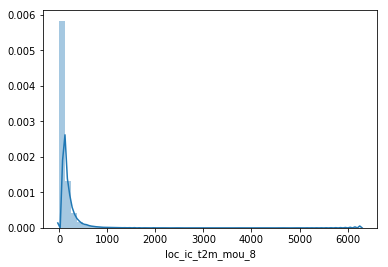

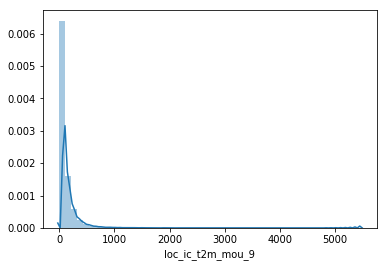

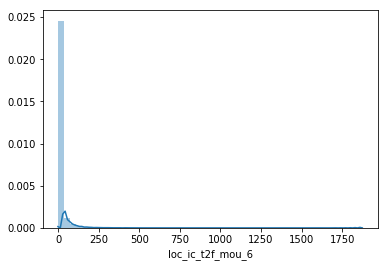

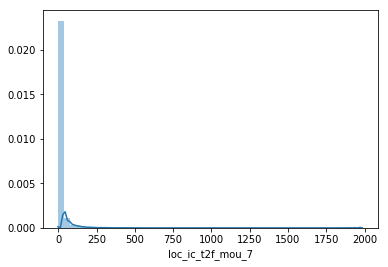

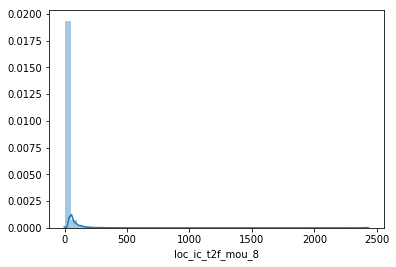

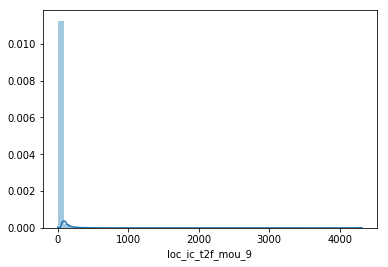

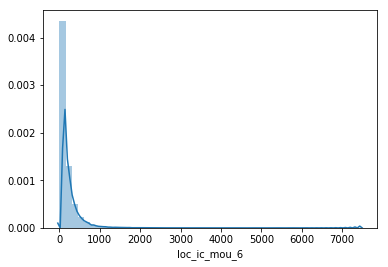

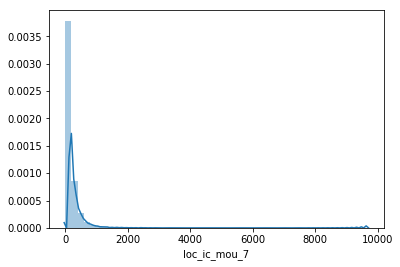

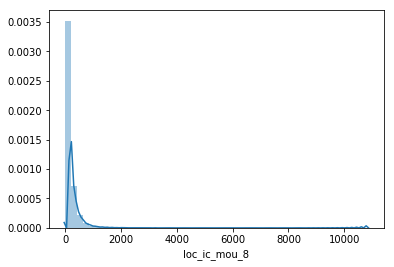

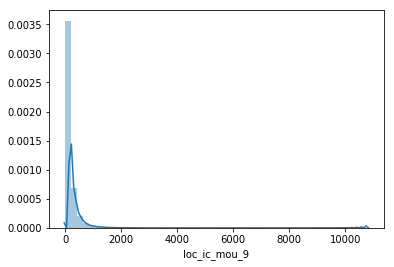

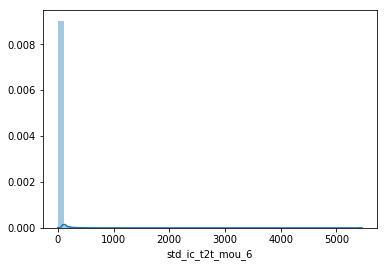

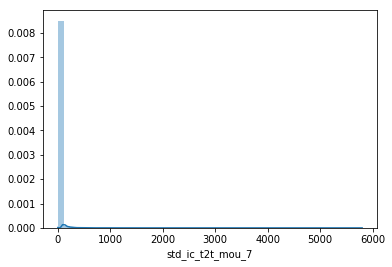

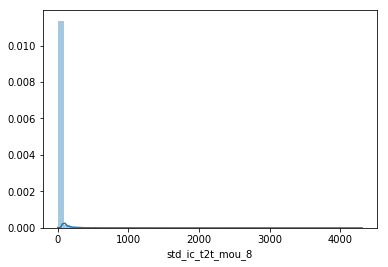

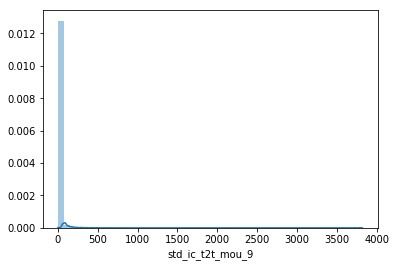

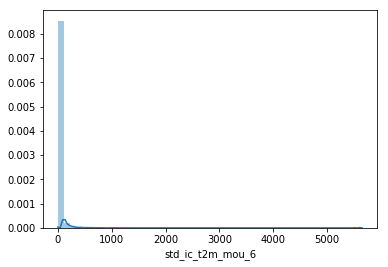

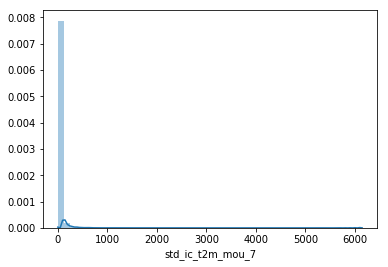

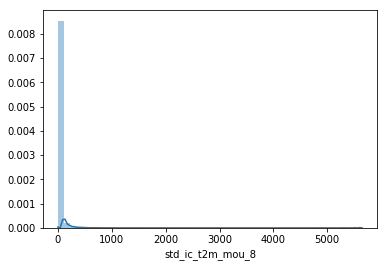

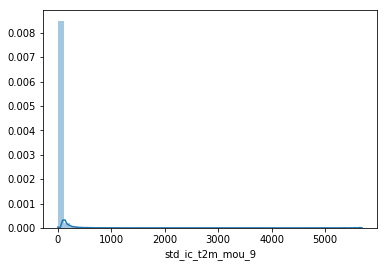

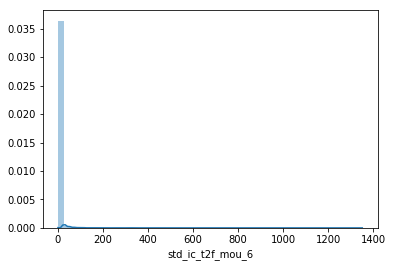

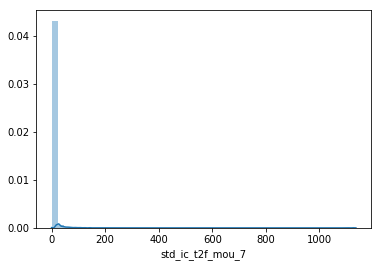

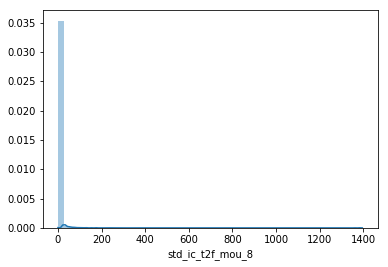

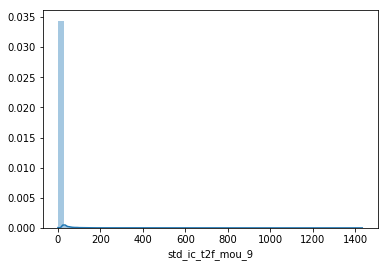

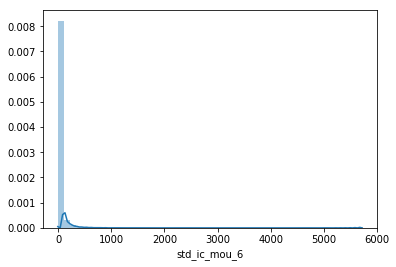

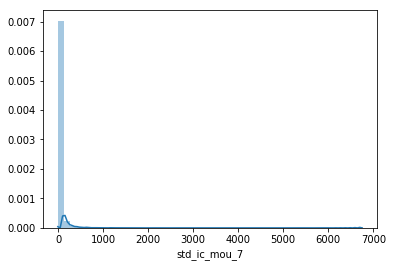

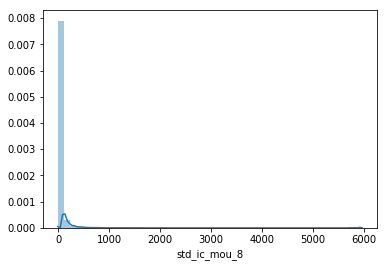

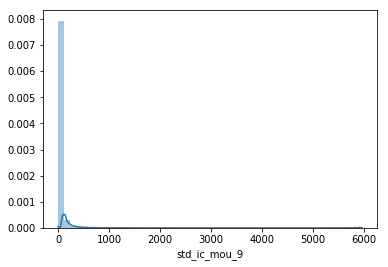

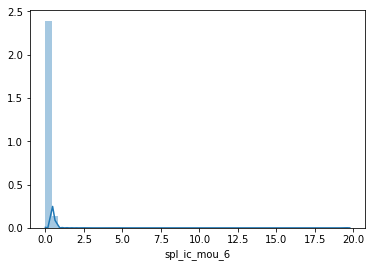

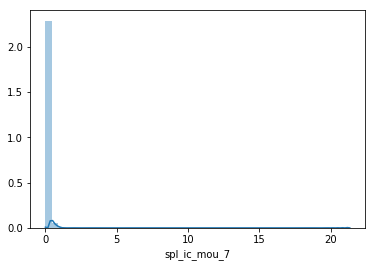

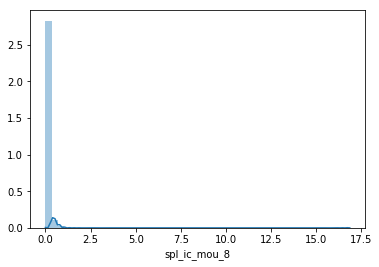

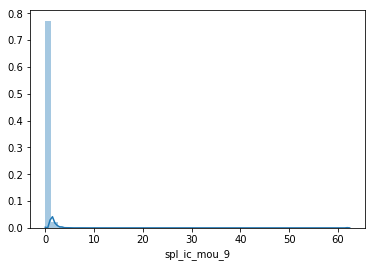

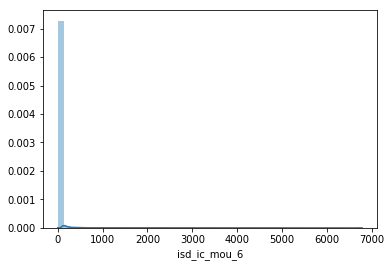

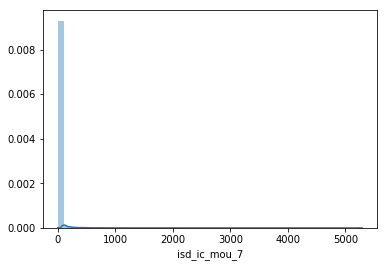

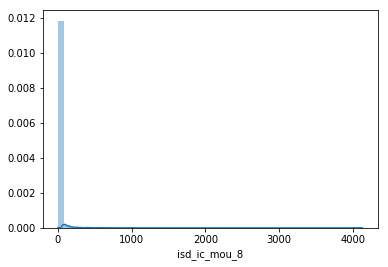

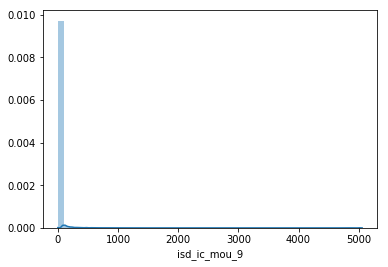

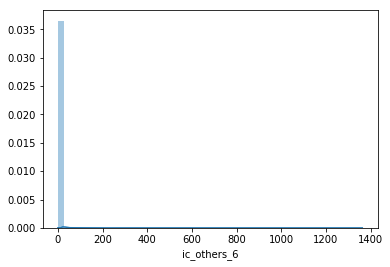

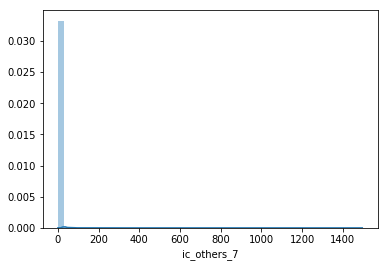

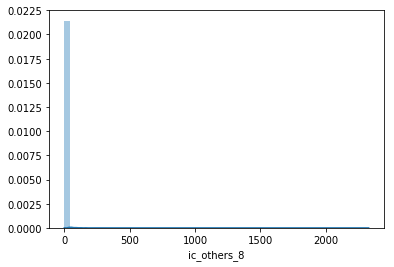

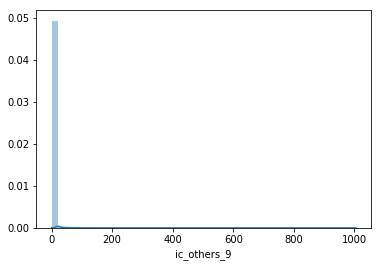

In [13]:
dates=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']
for i, col in enumerate(col_with_null):
    if(col not in dates):
        plt.figure(i)
        sns.distplot(telecom[~telecom[col].isnull()][col])

In [21]:
##Either impute or drop the values
for col in col_with_null:
    telecom = telecom[~telecom[col].isnull()]
print(telecom.shape)
print(round((telecom.shape[0]/99999)*100,2))
#for col in col_with_null:
 #   telecom[col].fillna(value=0,inplace=True)

(84185, 170)
84.19


In [15]:
col_with_null = telecom.columns[telecom.isna().any()].tolist()
print(col_with_null)

[]


In [17]:
telecom.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=170)

In [18]:
pd.set_option('display.max_columns',170)

In [19]:
telecom.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.0,0.0,0.00,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.00,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,44,23,30,0,0.0,108.07,365.47,0.0,0.0,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.00,0.00,0.00,0.0
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.00,47.64,108.68,120.94,18.04,0.0,0.0,0.00,0.0,46.56,236.84,96.84,42.08,0.45,0.0,0.0,0.00,155.33,412.94,285.46,124.94,115.69,71.11,67.46,148.23,14.38,15.44,38.89,38.98,99.48,122.29,49.63,158.19,229.56,208.86,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,167.09,118.18,21.73,58.34,43.23,3.86,139.33,306.66,239.03,171.49,370.04,519.53,395.03,517.74,0